/var/folders/90/1nrswq3j4216t1pq8n3pl_200000gq/T/ipykernel_36304/295962136.py:68: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(N)): # go over each point in our output domain


  0%|          | 0/360 [00:00<?, ?it/s]

/var/folders/90/1nrswq3j4216t1pq8n3pl_200000gq/T/ipykernel_36304/295962136.py:84: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(A[::SubSample],'k',markerfmt='ko',use_line_collection=True)
/var/folders/90/1nrswq3j4216t1pq8n3pl_200000gq/T/ipykernel_36304/295962136.py:85: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(B[::SubSample],'r',markerfmt='ro',use_line_collection=True)
/var/folders/90/1nrswq3j4216t1pq8n3pl_200000gq/T/ipykernel_36304/295962136.py:86: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotl

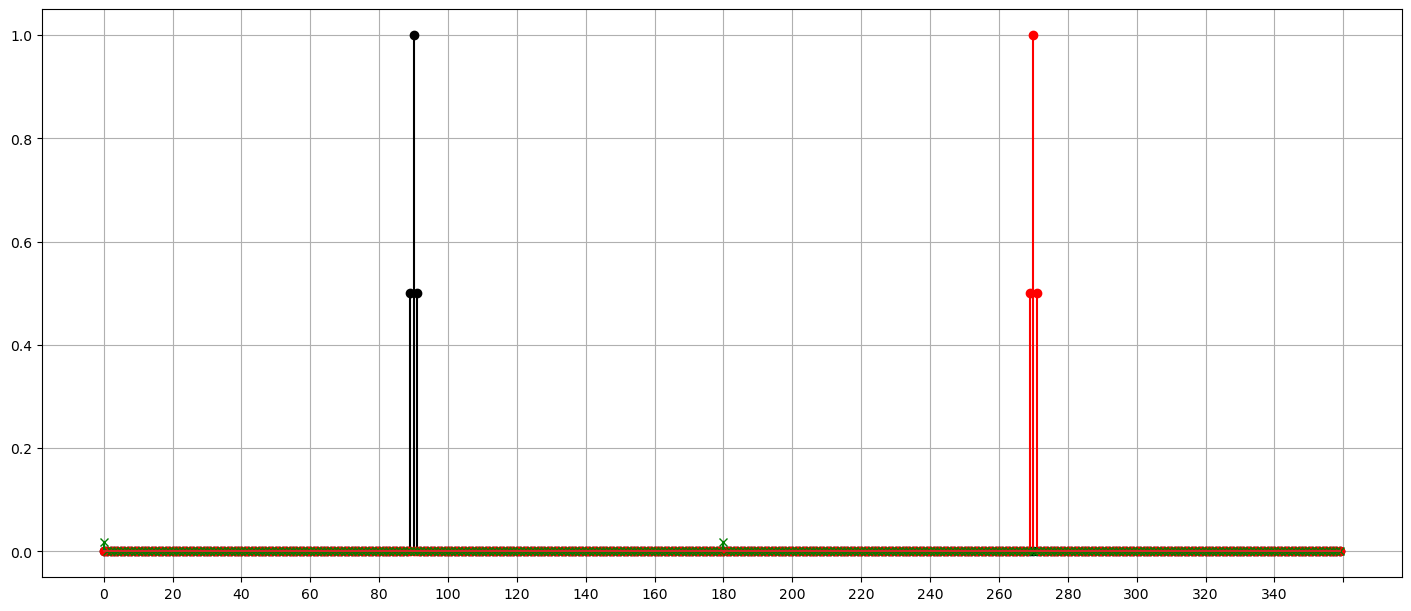

In [93]:
%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm
import math
from tqdm import tqdm_notebook as tqdm
import skfuzzy as fuzz

# our domain, [0, 360]
SubSample = 1 # do we want to downsample the resolution of X (takes awhile otherwise)
X = np.asarray( range(0,360,SubSample) )

# fuzzy set 1
A = np.zeros( np.asarray(range(0,360,1)).size )
pts = np.arange(0, 360, 1)
if(0):
    a = 35
    b = 45
    c = 55
else:
    a = 88
    b = 90
    c = 92
A = fuzz.trimf(pts, [a, b, c])

# fuzzy set 2
B = np.zeros( np.asarray(range(0,360,1)).size )
pts = np.arange(0, 360, 1)
if(0):
    a = 305
    b = 315
    c = 325
else:
    a = 268
    b = 270
    c = 272
B = fuzz.trimf(pts, [a, b, c])

# output fuzzy set
C = np.zeros( X.size )
Conf = np.ones( X.size )

def calculate_angle(x, y):
    angle = math.atan2(y, x)
    if angle < 0:
        angle += 2.0 * math.pi
    angle = (180 / math.pi) * angle
    return angle

# define the function
def Selector( arg1, arg2 ):
    # convert to vector
    a = np.asarray([ math.cos(arg1 * (math.pi/180)) , math.sin(arg1 * (math.pi/180)) ])
    b = np.asarray([ math.cos(arg2 * (math.pi/180)) , math.sin(arg2 * (math.pi/180)) ])
    a = a/np.linalg.norm(a)
    b = b/np.linalg.norm(b)   
    c = (a + b)/2
    res = calculate_angle(c[0],c[1])
    if(res > 359): 
        res = 360 - res
    return res, np.linalg.norm(c)

N = X.size
N2 = A.size
N3 = B.size
for i in tqdm(range(N)): # go over each point in our output domain
    for j in range(N2): # go over all x
        for k in range(N3): # go over all y
            indx1 = math.floor(j/SubSample)
            indx2 = math.floor(k/SubSample)
            r, l = Selector( X[indx1], X[indx2] )
            r_round = round(r)
            if( r_round == X[i] ): # is this one of our points?
                m = min( min( A[j], B[k] ), l ) # t-norm
                #m = min( A[j], B[k] ) # t-norm                
                if( m > C[i] ):
                    C[i] = m          # we are taking the sup
                Conf[i] = min( Conf[i], l ) 

# plot it!
fig, ax = plt.subplots(1, 1, layout='constrained', figsize=(14,6))
plt.stem(A[::SubSample],'k',markerfmt='ko',use_line_collection=True)
plt.stem(B[::SubSample],'r',markerfmt='ro',use_line_collection=True)
plt.stem(C,'g',markerfmt='gx',use_line_collection=True)
#plt.stem(Conf,markerfmt='go',use_line_collection=True)
b=range(0,N)
plt.fill_between( b, C, color="skyblue", alpha=0.3)
#plt.fill_between( b, Conf, color="yellow", alpha=0.05)
xi = list(range(len(X)))
plt.xticks(xi, X)  
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.grid()
plt.show()

/var/folders/90/1nrswq3j4216t1pq8n3pl_200000gq/T/ipykernel_36304/574948383.py:3: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(A[::SubSample],'k',markerfmt='ko',use_line_collection=True)
/var/folders/90/1nrswq3j4216t1pq8n3pl_200000gq/T/ipykernel_36304/574948383.py:4: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(B[::SubSample],'r',markerfmt='ro',use_line_collection=True)
/var/folders/90/1nrswq3j4216t1pq8n3pl_200000gq/T/ipykernel_36304/574948383.py:5: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 

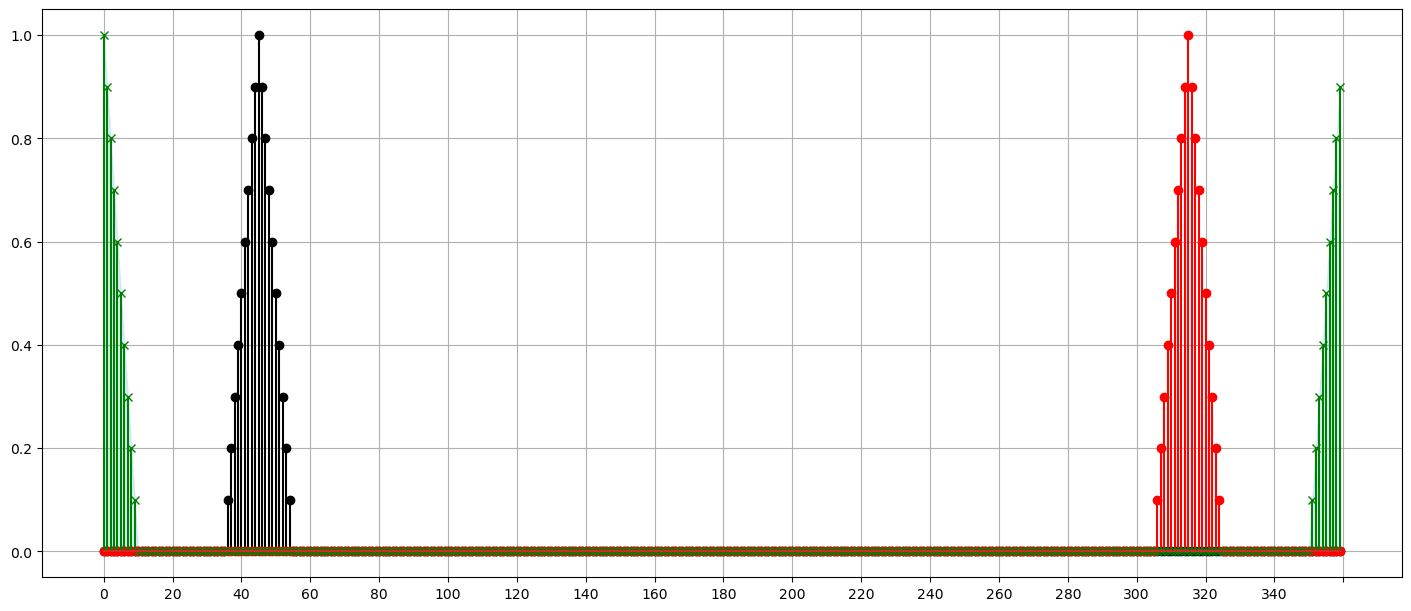

In [88]:
# plot it!
fig, ax = plt.subplots(1, 1, layout='constrained', figsize=(14,6))
plt.stem(A[::SubSample],'k',markerfmt='ko',use_line_collection=True)
plt.stem(B[::SubSample],'r',markerfmt='ro',use_line_collection=True)
plt.stem(C,'g',markerfmt='gx',use_line_collection=True)
#plt.stem(Conf,markerfmt='go',use_line_collection=True)
b=range(0,N)
plt.fill_between( b, C, color="skyblue", alpha=0.3)
#plt.fill_between( b, Conf, color="yellow", alpha=0.05)
xi = list(range(len(X)))
plt.xticks(xi, X)  
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.grid()
plt.show()

/var/folders/90/1nrswq3j4216t1pq8n3pl_200000gq/T/ipykernel_36304/1237865697.py:3: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(A[::5],markerfmt='ko',use_line_collection=True)
/var/folders/90/1nrswq3j4216t1pq8n3pl_200000gq/T/ipykernel_36304/1237865697.py:4: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(B[::5],markerfmt='ro',use_line_collection=True)
/var/folders/90/1nrswq3j4216t1pq8n3pl_200000gq/T/ipykernel_36304/1237865697.py:5: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be remov

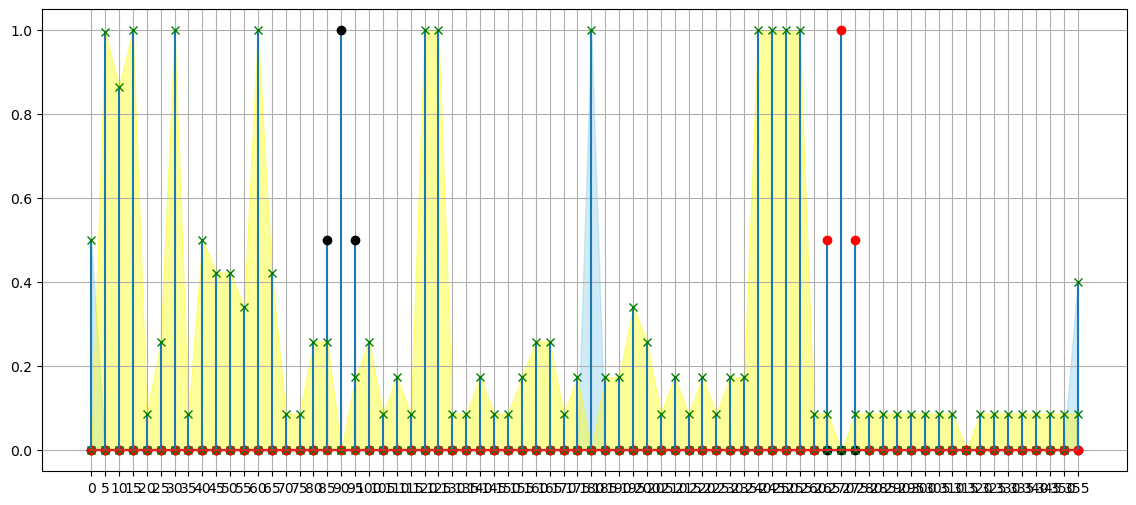

In [41]:
# plot it!
fig = plt.figure(figsize=(14, 6))
plt.stem(A[::5],markerfmt='ko',use_line_collection=True)
plt.stem(B[::5],markerfmt='ro',use_line_collection=True)
plt.stem(C,markerfmt='gx',use_line_collection=True)
plt.stem(Conf,markerfmt='gx',use_line_collection=True)
b=range(0,N)
plt.fill_between( b, C, color="skyblue", alpha=0.4)
plt.fill_between( b, Conf, color="yellow", alpha=0.4)
xi = list(range(len(X)))
plt.xticks(xi, X)  
plt.grid()
plt.show()